# **sklearn SGDRegressor**

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
#loading the boston dataset from sklearn
X = load_boston().data
Y = load_boston().target

In [0]:
#splitting the dataset into train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [0]:
#standardizing the data
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
#sklearn SGDRegressor model without regularization
clf = SGDRegressor(penalty=None,alpha=0,max_iter=500)
#clf = SGDRegressor()
clf.fit(X_train, Y_train)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
#weight vector obtained by sklearn SGDRegressor model
sklearn_W=clf.coef_
sklearn_W

array([-1.01498388,  1.04914638,  0.08204709,  0.63096429, -1.87417512,
        2.69913176, -0.27455695, -3.10496178,  2.10098962, -1.88272296,
       -2.26244145,  0.58231771, -3.44130655])

In [0]:
#intercept for the model obtained by sklearn SGDRegressor
sklearn_b=clf.intercept_
sklearn_b

array([22.74569767])

In [0]:
#mean squared error
Y_pred=clf.predict(X_test)
sklearn_MSE=mean_squared_error(Y_test,Y_pred)

In [0]:
sklearn_MSE

27.173522895888894

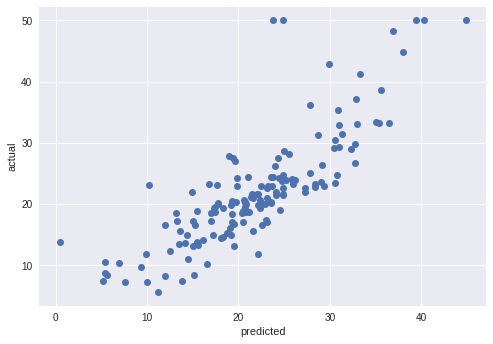

In [0]:
#plotting predicted values VS actual values
plt.plot(Y_pred,Y_test,linestyle='',marker='o')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# **My implementation of SGDRegressor**

In [0]:
#loading the dataset
boston=load_boston()
X=boston.data
Y=boston.target

#splitting the dataset into train,test datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#feature scaling
scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
print('Shape of X_train',X_train.shape,'\nShape of X_test',X_test.shape)

Shape of X_train (354, 13) 
Shape of X_test (152, 13)


In [0]:
iterations=500 #max no of iterations
sample_size=150 #sample size of data to consider during each iteration
W=np.random.normal(0.0,1.0,size=13) #initializing the weight vector with random values from normal distribution(mean=0 and std-dev=1)
b=np.random.normal(0.0,1.0,size=1) #initializing intercept term with a random value from normal distribution
mse=[] #empty list for storing mse in each iteration
lr=0.01 #learning rate

for itr in range(iterations):
    #generating random  numbers to be used as index for sampling
    idx=np.random.choice(np.arange(len(X_train)),size=sample_size,replace=False)
    X_sample=X_train[idx]
    Y_sample=Y_train[idx]
    #predicted values
    Y_pred=np.dot(X_sample,W)+b
    mse.append(mean_squared_error(Y_sample,Y_pred))
    if(itr!=0):
        if(abs(mse[itr]-mse[itr-1])>=0.1):
            for i in range(len(X_sample)):
                yhat=np.dot(W.T,X_sample[i])+b
                W=W-lr*(-2)*X_sample[i]*(Y_sample[i]-yhat)
                b=b-lr*(-2)*(Y_sample[i]-yhat)
            lr=lr/2
        else:
            break

In [0]:
#MSE for my implementation
Y_pred=np.dot(X_test,W)+b
my_MSE=mean_squared_error(Y_test,Y_pred)
my_MSE

27.09624954954564

In [0]:
#weights obtained by my implementation
my_W=W
print(my_W)

[-1.02467402  0.80761971 -0.34990453  0.43953371 -1.2261729   2.63689706
  0.25720897 -2.33834904  1.50005187 -1.04157106 -2.0133921   0.72474908
 -3.99110089]


In [0]:
#intercept obtained by my implementation
my_b=b
print(b)

[22.72308662]


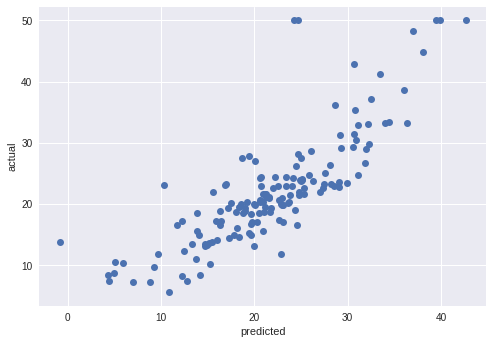

In [0]:
#predicted values vs actual values
plt.plot(Y_pred,Y_test,linestyle='',marker='o')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

**Comparing my impementation and sklearn implementation of SGDRegressor**

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Weights", "sklear implementation", "my implementation"]


for i in range(13):
  x.add_row(["W"+str(i+1),sklearn_W[i],my_W[i]])

x.add_row(["b",sklearn_b,my_b])
print(x)

+---------+-----------------------+----------------------+
| Weights | sklear implementation |  my implementation   |
+---------+-----------------------+----------------------+
|    W1   |  -1.0149838764122392  |  -1.024674018911933  |
|    W2   |   1.0491463807290133  |  0.8076197058072463  |
|    W3   |  0.08204709287137066  | -0.34990453180233544 |
|    W4   |   0.6309642912826718  |  0.4395337060854564  |
|    W5   |  -1.8741751216435873  |  -1.226172897391543  |
|    W6   |   2.6991317567594706  |  2.636897064116853   |
|    W7   |  -0.2745569508530523  |   0.25720896610251   |
|    W8   |   -3.104961779342055  | -2.3383490370415436  |
|    W9   |    2.10098961570462   |  1.5000518747058718  |
|   W10   |  -1.8827229635000406  |  -1.041571061518702  |
|   W11   |  -2.2624414505209454  |  -2.013392096886359  |
|   W12   |   0.5823177105483278  |  0.7247490768930089  |
|   W13   |   -3.441306549423374  |  -3.991100894226346  |
|    b    |     [22.74569767]     |    [22.72308662]    

**Comparing MSE for my implementation and sklearn implementation**

In [0]:
print('sklearn implementation MSE: ',sklearn_MSE)
print('my implementation MSE: ',my_MSE)

sklearn implementation MSE:  27.173522895888894
my implementation MSE:  27.09624954954564


**RMSE for my implementation and sklearn implementation**

In [0]:
sklearn_RMSE=np.sqrt(sklearn_MSE)
my_RMSE=np.sqrt(my_MSE)

In [0]:
print('sklearn implementation RMSE: ',sklearn_RMSE)
print('my implementation RMSE: ',my_RMSE)

sklearn implementation RMSE:  5.212822929650391
my implementation RMSE:  5.205405800660083
